### Implementation of Multiple Linear Regression

Summary of steps:

1. Create following functions:  
- `compute_cost()` - returns the least squared error cost for training set.  
- `compute_gradient()` - returns the partial derivative of all w parameters and b.    
- `gradient_descent()` - runs gradient descent algo for given number of iterations and returns cost, parameter history along with final values of parameters w and b.    
- `compute_model_output()` - will be used to visualize model performance. It takes in final values of w and b & returns output of our model for each training example.  
        
2. Plots created:  
        - Scatter plot showing all training samples. [CHECK THIS ONE!! How to show all training samples on coordinate axes when multiple variables given?]  
        - Cost vs. number of iterations keeping learning rate constant.  
        - Cost vs. learning rate keeping number of iterations constant.  
        - Display how the final regression line fits on our training data.  
        

In [49]:
#load libraries
import numpy as np
import matplotlib.pyplot as plt
#to adjust axis labels in scientific notation
from matplotlib.ticker import ScalarFormatter
#normalize function to normalize the dataframe variables.
from sklearn.preprocessing import normalize
import math
import time

In [50]:
import pandas as pd

In [51]:
#cost function
def compute_cost(xtrain, ytrain, w, b):
    """
    Objective- return the least squared error cost
    Arguments-
    xtrain [(m,n) matrix]- m training samples, n variables
    ytrain [(n,) 1-D vector]- m target outputs
    w [(n,) 1-D vector]- weight coefficients for n variables.
    b - scalar parameter.
    Returns-
    Least squared error cost.
    """
    cost = 0.0
    m = xtrain.shape[0]
    for i in range(m):
        fx = np.dot(xtrain[i],w) + b
        err = (fx - ytrain[i])**2
        cost = cost + err
    #average the sum of squared errors
    cost = (1/2*m)*cost
    return cost

In [52]:
#compute gradient
def compute_gradient(xtrain, ytrain, w, b):
    """
    Objective- returns partial derivate of the cost funtion w.r.t all parameters
    Arguments-
    xtrain [(m,n) matrix]- m training samples, n variables
    ytrain [(n,) 1-D vector]- m target outputs
    w [(n,) 1-D vector]- weight coefficients for n variables.
    b - scalar parameter.
    Returns-
    dj_dw [(n,) 1-D vector]- gradient of all w parameters
    dj_db [scalar]- gradient of parameter b.
    """
    m,n = xtrain.shape
    #1-D vector with n values; will store gradient of all w parameters
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        fx = np.dot(xtrain[i],w)+b
        err = fx - ytrain[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err*xtrain[i][j]
        dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db


In [53]:
#compute the output of the linear regression model
def compute_model_output(xtrain, w, b):
    """
    Objective- compute the output of model given the values w and b
    Arguments-
    1. xtrain [(m,n) matrix]- m training samples, n variables
    2. w [(n,) 1-D vector]- weight coefficients for n variables.
    3. b - scalar parameter.
    Returns-
    fx [(m,) 1-D vector]- predicted output by model
    """
    m = xtrain.shape[0]
    #fx stores predicted outcomes for all m observations
    fx = np.zeros(m)
    for i in range(m):
        fx[i] = np.dot(xtrain[i],w) + b
    
    return fx

In [54]:
#function that runs gradient descent
def gradient_descent(xtrain, ytrain, w, b, alpha, iters, compute_cost, compute_gradient):
    """
    Objective- runs the gradient descent algorithm for given number of iterations.
    Arguments-
    1. xtrain [(m,n) matrix]- m training samples, n variables
    2. ytrain [(n,) 1-D vector]- m target outputs
    3. w [(n,) 1-D vector]- weight coefficients for n variables.
    4. b - scalar parameter.
    5. alpha- learning rate
    6. iters- total number of iterations.
    7. compute_cost, compute_gradient- functions created earlier.
    Returns:
    1. J_history- stores iteration index & history of all cost values.
    2. w_history, b_history- stores iteration index & all parameter values at each iteration.
    3. w_in, b_in- final values of parameters w and b.
    """
    w_in, b_in = w, b
    J_history, w_history, b_history = [], [], []
    m, n = xtrain.shape
    for i in range(iters):
        gradient_w, gradient_b = compute_gradient(xtrain, ytrain, w_in, b_in)
        #update both parameters simultaneously.
        w_in = w_in - alpha*gradient_w
        b_in = b_in - alpha*gradient_b
        
        #prevent resource exhaustion
        if i < 100000:
            J_history.append([i,compute_cost(xtrain, ytrain, w_in, b_in)])
            w_history.append([i,w_in])
            b_history.append([i,b_in])
        
        #printing values at some iterations interval
#         if (i % math.ceil(iters/10)) == 0:
#             print(f"Iteration: {i}, Cost: {J_history[i][1]:.3e}", 
#                   f"W: {w_in:.3e}, b: {b_in:.3e}")
        
    return J_history, w_history, b_history, w_in, b_in
            

In [55]:
##some initializations

#dataset
#area, bedroom, bathroom, number of floors
xfeatures = ['area (sqft)','bedrooms','bathrooms','floors']
xtrain = np.array([
                   [7420, 4, 2, 3],
                   [8960, 4, 4, 4],
                   [6420, 3, 2, 2],
                   [4320, 3, 1, 2],
                   [3240, 4, 1, 3],
                   [6615, 4, 2, 2],
                   [4510, 4, 1, 2],
                   [3630, 4, 1, 2],
                   [8050, 2, 1, 1],
                   [3000, 3, 1, 2],
                   [3420, 5, 1, 2],
                   [3850, 3, 1, 2]
                  ])
#price of the 12 houses
ytrain = np.array([13300000, 12250000, 8855000, 8750000, 6107500, 6090000, 4480000, 
          3010000, 3003000, 2485000, 1960000, 1750000])
#divide ytrain by 1000, prices in 1000$ scale
ytrain = ytrain/1000

Text(0, 0.5, 'Price (in 1000$)')

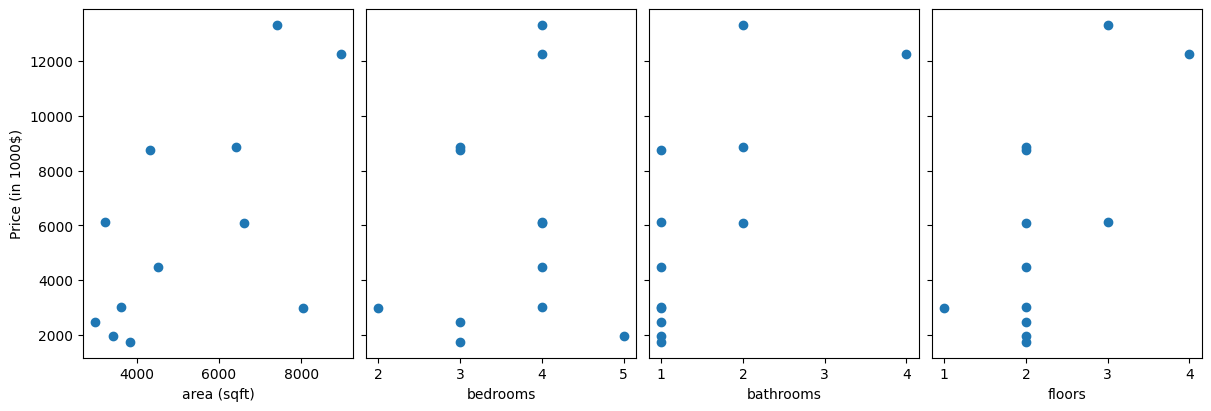

In [56]:
#Visualizing relation between Price of house and each feature
fig, ax = plt.subplots(1, 4, constrained_layout = True, figsize = (12,4), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(xtrain[:,i], ytrain)
    ax[i].set_xlabel(xfeatures[i])
ax[0].set_ylabel('Price (in 1000$)')

In [57]:
#Feature scaling; Normalize variables.
xtrain_normalized = normalize(xtrain)
#ytrain is sent as a nested list to normalize() as it expects multiple samples.
ytrain_normalized = normalize([ytrain])

# #dimensions of training set
m,n = xtrain.shape

#unlisting the nested list ytrain_normalized
ytrain_normalized2 = []
for sublist in ytrain_normalized:
    for i in sublist:
        ytrain_normalized2.append(i)

In [58]:
#learning rate
alpha = 0.01
#total number of steps in gradient descent
iters = 10000
#initial values of parameters
w = np.zeros(n)
b = 0.0
#call gradient descent
J_history, w_history, b_history, final_w, final_b = gradient_descent(xtrain_normalized, ytrain_normalized2, w, b, alpha, iters, 
                                                                     compute_cost, compute_gradient)

In [59]:
#using the parameter values to analyse the performance on training set
y_output = compute_model_output(xtrain_normalized, final_w, final_b)

In [60]:
test_data = np.array([7000, 3, 1, 1])
test_data2 = normalize([test_data])

#unlist
test_data3 = []
for sublist in test_data2:
    for i in sublist:
        test_data3.append(i)

In [61]:
#testing the output for an unseen data sample.
#target output is 5250000
np.dot(test_data3, final_w) + final_b

0.24356154291958926

TypeError: list indices must be integers or slices, not tuple

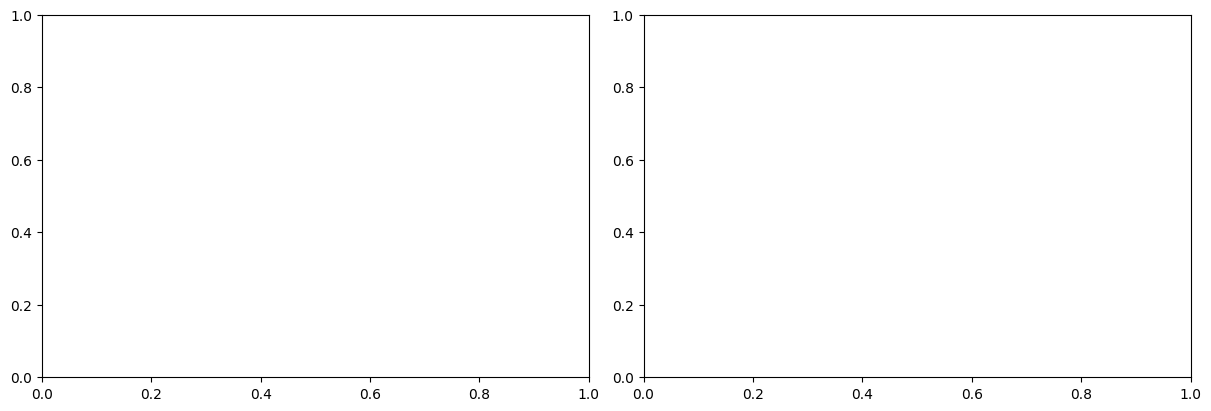

In [62]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
#first 300 steps
ax1.plot(J_history[0:300,1])
ax2.plot(J_history[-500:,0], J_history[-500:,1])
ax1.set_title("Cost vs. iteration (first 300)");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()